<a href="https://colab.research.google.com/github/jabazer/tao-fing/blob/master/GradienteEstoc%C3%A1stico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import packages.
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import pylab as pl



En este último notebook volvemos al método más sencillo de optimización, descenso por gradiente, pero agregamos ruido modelado como variables aleatorias o procesos estocásticos.

El resultante es un método para diseñar algoritmos que procesen datos aleatorios recursivamente, y es base de tres familias de algoritmos de aprendizaje automático

1) Reinforcement learning

2) Neural networks

3) Linear mean square filters

En este caso tenemos que la función a minimizar es la esperanza de una función aleatoria

$$f(\theta)=E_{\xi}\left[F(\theta,\xi)\right]$$


$$F(\theta)=f(\theta)+\eta$$

donde $\xi$ es la variable aleatoria, y $\theta$ la variable determinística que 
queremos obtener.

Luego queremos resolver 

\begin{align}
\min_{\theta\in \mathcal \Theta}& f(\theta)\\
=\min_{\theta\in  \Theta}& E_{\xi}\left[F(\theta,\xi)\right]\\
=\min_{\theta\in  \Theta}& \int p(\xi)F(\theta,\xi) d\xi
\end{align}




Si aplicamos descenso por gradiente a este problema tenemos 

\begin{align}
\theta^{k+1}&=\theta^k+\alpha_k \nabla_\theta f(\theta^k)\\
\theta^{k+1}&=\theta^k+\alpha_k \nabla_\theta E_{\xi}\left[F(\theta,\xi)\right]
\end{align}

Si pudieramos calcular la esperanza, entonces simplemente corremos el algoritmo de arriba. 

Si en cambio tenemos una muestra de la variable aleatoria $\xi^k$, o mejor el del gradiente estocástico entonces podemos simplemente tirar la esperanza y usar una muestra

\begin{align}
\hat \theta^{k+1}&=\hat \theta^k+\alpha_k \nabla_\theta  F(\theta^k,\xi^k)
\end{align}

Idea, el gradiente es un acumulador que acumula promedios recursivamente, y estos aproximan la esperanza 

De hecho uno no tiene por qué quedarse con una sola muestra y puede hacer bacth stochastic gradient descent



\begin{align}
\hat \theta^{k+1}&=\hat \theta^k+\alpha_k \sum_{n=1}^N \nabla_\theta  F(\theta^k,\xi^k_n)
\end{align}


Es algoritmo de SGD corresponde a usar una sola muestra por iteración  $N=1$

Ejemplo

$$y=A\theta_0+\xi, \text{ con } \xi_i\sim \mathcal N(0,\sigma^2),\ i=1,2$$

Queremos resolver

\begin{align}
\min_{\theta\in \mathbb R^2}E\left[||A\theta -y||^2\right]
\end{align}

El gradiente es 


\begin{align}
E\left[2A^TA\theta -2A^Ty\right]
\end{align}

El gradiente estocástico

\begin{align}
2A^TA\theta -2A^Ty
\end{align}

para ello necesitamos muestras de la variable aleatoria $y$

Entonces corremos
\begin{align}
\hat \theta^{k+1}&=\hat \theta^k+\alpha_k\left(2A^TA\theta^k -2A^Ty^k\right) 
\end{align}




(0.0, 2.0)

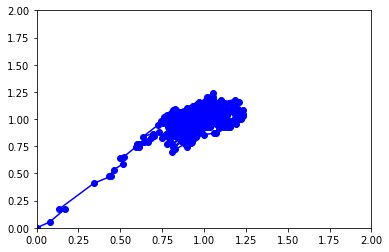

In [ ]:
sigma=2
#sigma=0
A=[[2, 1],
   [1, 2]]
I=[[1, 0],
   [0, 1]]
AT=np.transpose(A)
ATA=np.dot(AT,A)
theta_0=np.transpose([1,1])
trayectoria0=np.array([])
trayectoria1=np.array([])
theta=np.array([0,0])
for k in np.arange(500):
    trayectoria0=np.append(trayectoria0,theta[0])
    trayectoria1=np.append(trayectoria1,theta[1])
    alpha=1/(10*k+1000)
    alpha=1/(200)
    xi = np.random.normal(0, sigma, 2)
    y=np.dot(A,theta_0)+xi;
    gradiente_estocastico=2*np.dot(ATA,theta)-2*np.dot(AT,y)
    theta=theta-alpha*gradiente_estocastico;
pl.plot(trayectoria0,trayectoria1,'bo-')
pl.xlim(0, 2)
pl.ylim(0, 2)


#¿Cómo usar SGD para procesar datos recursivamente?

##Preliminares sobre clasificación
Consideremos el caso en que queremos clasificar muestras linealmente.
Tenemos vectores $x_i\in\mathbb R^N$ y queremos clasificarlas en dos clases, asignandole una etiqueta $y_i\in{0,1}$.

El clasificador lineal que hace esto es $$y_i=(\text{signo}(a^T x_i)+1)/2$$

Esto significa que 

$$y_i=\begin{cases}0 &\text{ si  }\  a^T x_i<0\\
1 &\text{ si  }\  a^T x_i>0
\end{cases}$$

y puede escribirse en dos pasos para simplificar notación

\begin{align}
z_i&=\alpha^T x_i\\
y_i&=C(z_i)
\end{align}



donde $$C(z):=(\text{signo}(z)+1)/2=\begin{cases}0 &\text{ si  }\  z<0\\
1 &\text{ si  }\  z>0
\end{cases}$$


Entonces el clasificador lineal con menos error cuadrático medio es el que minimiza

$$\min_{a\in\mathbb R^N}E_{x,y}\left[\left(y-C(a^Tx)\right)^2\right]$$


Podríamos intentar SGD sobre este costo, pero primero vamos a introducir la rectified linear unit (RELU) como aproximación convexa del clasificador lineal 
substituyendo  $C(z)$ por 


$$\text{RELU}(z):=\begin{cases}0 &\text{ si  }\  z<0\\
z &\text{ si  }\  z>0
\end{cases}$$


Se vio que esta aproximación convexa era demasiado difícil de entrenar porque cualquier dato que cayera en la zona $\alpha^T x$ no era sensible a una perturbación en $\alpha$, entonces se adoptó


$$\text{RELU}_\epsilon(z):=\begin{cases}\epsilon z &\text{ si  }\   z<0\\
z &\text{ si  }\  z>0
\end{cases}$$

Finalmente buscamos el clasificador óptimo que resuleva


$$\min_{a\in\mathbb R^N}E_{x,y}\left[\left(y-\text{RELU}_\epsilon(a^Tx)\right)^2\right]$$



Por último, queremos clasificadores afines con $z=\alpha^Tx+\beta$, lo que se convierte en lineal si  adjuntamos un uno al final de cada vector $x_i$ y redefinimos 

$$ \bar x_i\leftarrow \begin{pmatrix} x_i\\1
\end{pmatrix} \quad y \quad  a \leftarrow \begin{pmatrix} \alpha\\\beta
\end{pmatrix}$$ 

Con esto tenemos que $a^T\bar x_i=\alpha^T x_i+\beta$ y podemos seguir con el caso lineal (sin escribir la barra).



$$\min_{a\in\mathbb R^{N+1}}E_{x,y}\left[\left(y-\text{RELU}_\epsilon(a^Tx)\right)^2\right]$$


Teniendo que resolver este problema podemos usar SGD

$$a^{k+1}=a^k+\eta_k \left(y^k-\text{RELU}_\epsilon(a^Tx^k)\right) \nabla_a \text{RELU}_\epsilon(a^Tx^k)$$ 



#Sobre la convergencia de procesos estocásticos

La convergencia en error cuadrático medio (m.s.) no implica la convergencia con probabilidad 1 (a.s.). Abajo hay un ejemplo.

El teorema de Robbins Monró implica la convergencia en m.s. 
Con marttingalas y usando el teorema de Doob puede probarse convergencia de SGD a.s.

Ejemplo: Sea $X_{1}, X_{2}, \ldots, X_{n}, \ldots$ una sucesión de variables aleatorias tal que
$$
X_{n}= \begin{cases}0 & \text { with probability } 1-\frac{1}{n} \\ 1 & \text { with probability } \frac{1}{n}\end{cases}
$$


Converge a  $0$ en m.s., Pero no converge a.s. }


Prueba: Sea $0<\epsilon<1$, y para cualquier  $m$
$$
\begin{aligned}
\mathrm{P}\left\{\left|X_{n}-0\right|<\epsilon \text { for all } n \geq m\right\} &=\lim _{n \rightarrow \infty} \prod_{i=m}^{n}\left(1-\frac{1}{i}\right) \\
&=\lim _{n \rightarrow \infty} \prod_{i=m}^{n}\left(\frac{i-1}{i}\right) \\
&=\lim _{n \rightarrow \infty} \frac{(m-1)}{m} \frac{m}{(m+1)} \cdots \frac{(n-1)}{n} \\
&=\lim _{n \rightarrow \infty} \frac{m-1}{n} \rightarrow 0 \neq 1
\end{aligned}
$$